In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('car.csv')

In [14]:
data.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [15]:
data.shape

(100000, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

In [17]:
data.isnull().sum()

,0
Unnamed: 0,0
brand,0
model,0
color,76
registration_date,1
year,0
price_in_euro,0
power_kw,75
power_ps,72
transmission_type,0


In [18]:
data.isnull().sum()/data.shape[0]*100

,0
Unnamed: 0,0.000
brand,0.000
model,0.000
color,0.076
registration_date,0.001
year,0.000
price_in_euro,0.000
power_kw,0.075
power_ps,0.072
transmission_type,0.000


In [20]:
#finding duplicates
data.duplicated().sum()

np.int64(0)

In [21]:
#indentifing garbage values
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"*10)

brand
audi            21161
bmw             19810
ford            18790
hyundai          6989
kia              5734
fiat             5039
citroen          4083
dacia            3367
land-rover       3073
mazda            2190
jeep             1749
alfa-romeo       1437
jaguar           1398
honda             785
maserati          698
dodge             669
ferrari           590
bentley           541
lamborghini       361
aston-martin      277
isuzu             206
daihatsu          204
chevrolet         191
lada              191
cadillac          157
infiniti          112
lancia            105
daewoo             61
chrysler           32
Name: count, dtype: int64
******************************
model
Ford Focus              3875
Audi A3                 3567
Audi A4                 3397
Audi A6                 2880
Ford Fiesta             2785
                        ... 
Mazda CX-9                 1
Lancia ZETA                1
Ford Windstar              1
Aston Martin Lagonda       1
Fer

# **Exploratory Data Analysis (EDA)**

In [22]:
data.describe()

,Unnamed: 0,mileage_in_km
count,100000.000000,9.993200e+04
mean,49999.500000,8.559891e+04
std,28867.657797,7.929713e+04
min,0.000000,0.000000e+00
25%,24999.750000,2.550000e+04
50%,49999.500000,6.800000e+04
75%,74999.250000,1.270000e+05
max,99999.000000,3.800000e+06


In [28]:
data.describe(include="object")

,brand,model,color,registration_date,transmission_type,fuel_type,offer_description
count,100000,100000,99924,99999,100000,100000,100000
unique,29,590,14,369,4,54,79777
top,audi,Ford Focus,black,05/2023,Automatic,Petrol,Titanium
freq,21161,3875,24124,1846,53262,54290,174


In [29]:
# import re

# # --- Helper: pull a numeric value out of a string (handles "5,9 l/100 km", "124 g/km", "€34,990", etc.)
# def extract_number(s):
#     if pd.isna(s):
#         return np.nan
#     # grab first number (allows comma or dot as decimal)
#     m = re.search(r'[-+]?\d+(?:[.,]\d+)?', str(s))
#     if not m:
#         return np.nan
#     return float(m.group(0).replace(',', '.'))

# # Assuming 'data' is already loaded
# # Handle numeric conversions for columns

# # Convert 'price_in_euro' (remove € if exists, and handle commas)
# data['price_in_euro'] = data['price_in_euro'].apply(extract_number)

# # Convert 'fuel_consumption_l_100km' (remove ' l/100 km' and handle commas)
# data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].astype(str)  # Ensure it's a string
# data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].apply(lambda x: x.replace(' l/100 km', '').replace(',', '.'))
# data['fuel_consumption_l_100km'] = pd.to_numeric(data['fuel_consumption_l_100km'], errors='coerce')

# # Convert 'fuel_consumption_g_km' (remove ' g/km' and handle commas)
# data['fuel_consumption_g_km'] = data['fuel_consumption_g_km'].apply(extract_number)

# # Convert 'power_kw' and 'power_ps' to numeric
# data['power_kw'] = pd.to_numeric(data['power_kw'], errors='coerce')
# data['power_ps'] = pd.to_numeric(data['power_ps'], errors='coerce')

# # Convert 'mileage_in_km' to numeric (already float64)
# data['mileage_in_km'] = pd.to_numeric(data['mileage_in_km'], errors='coerce')

# # Convert 'year' to numeric (if it's not already)
# data['year'] = pd.to_numeric(data['year'], errors='coerce')

In [30]:
# # Drop obvious non-features
# drop_cols = [c for c in ['Unnamed: 0', 'offer_description'] if c in data.columns]
# data = data.drop(columns=drop_cols)

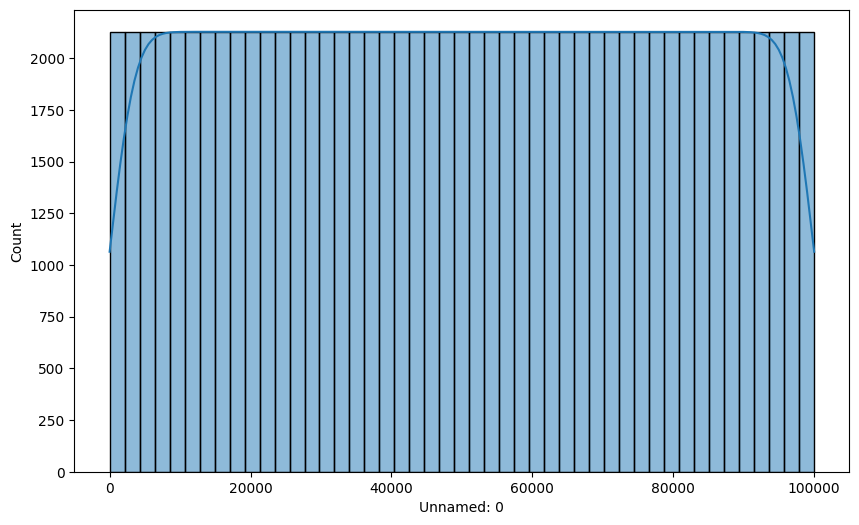

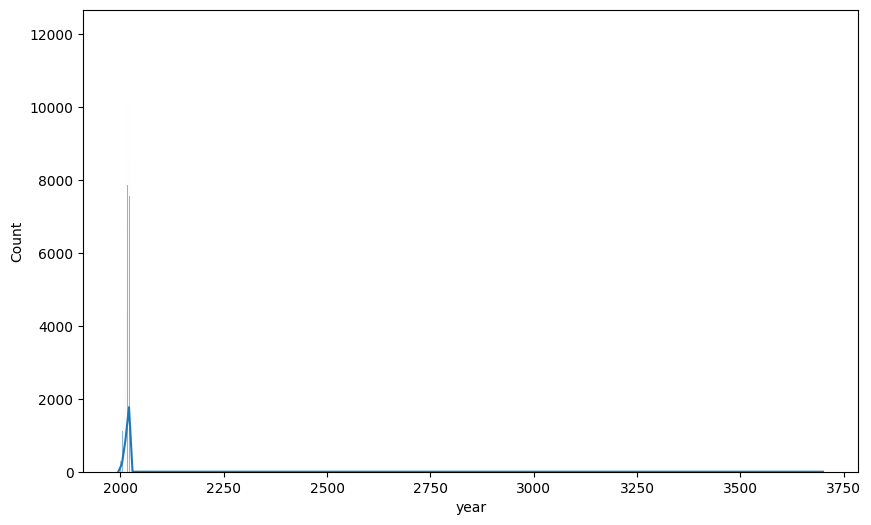

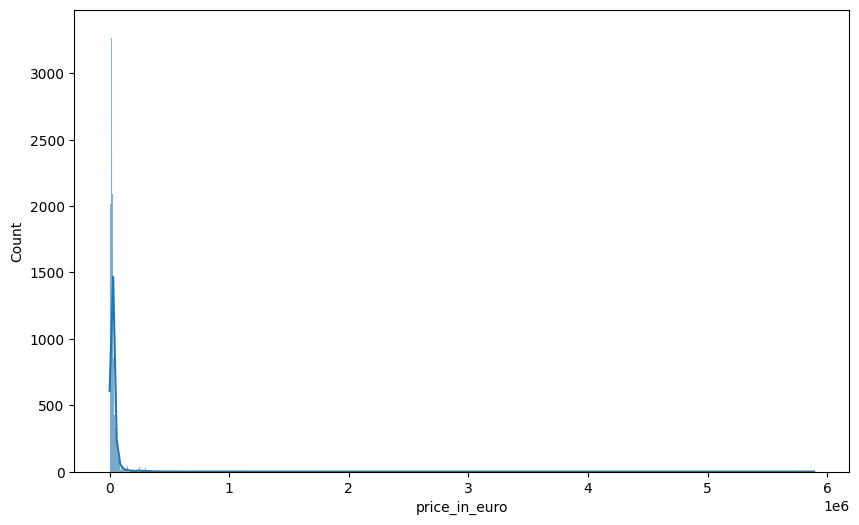

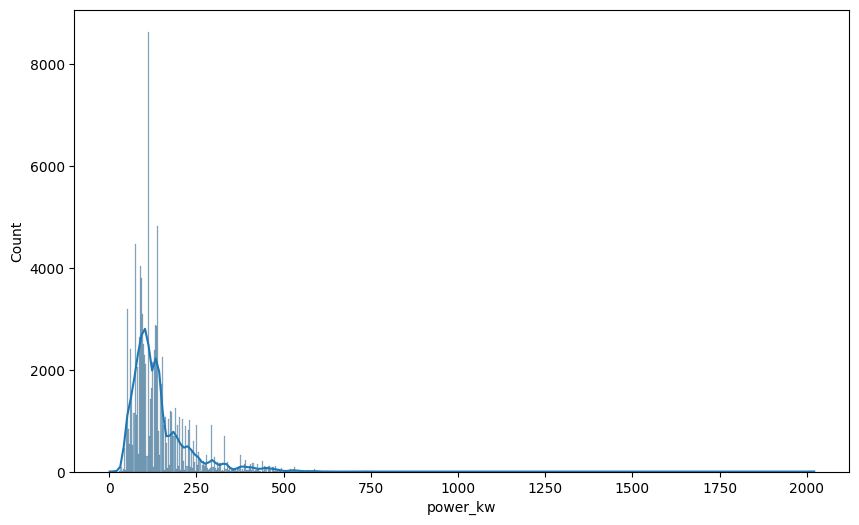

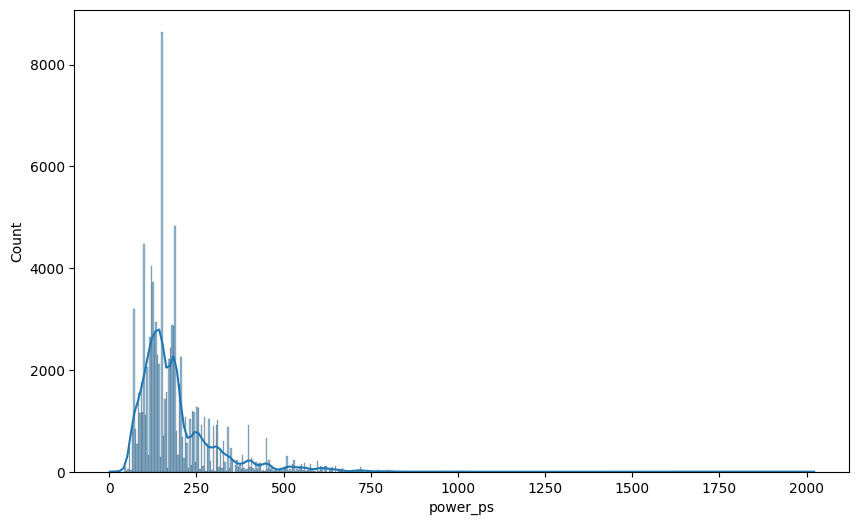

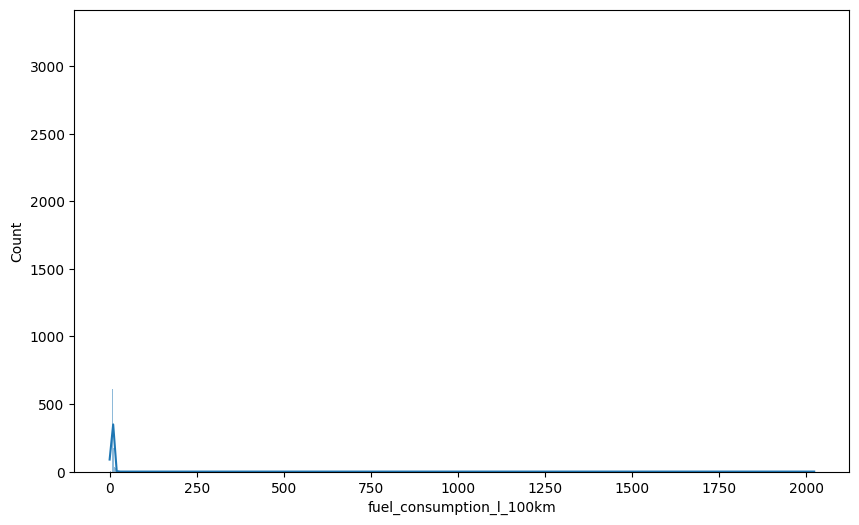

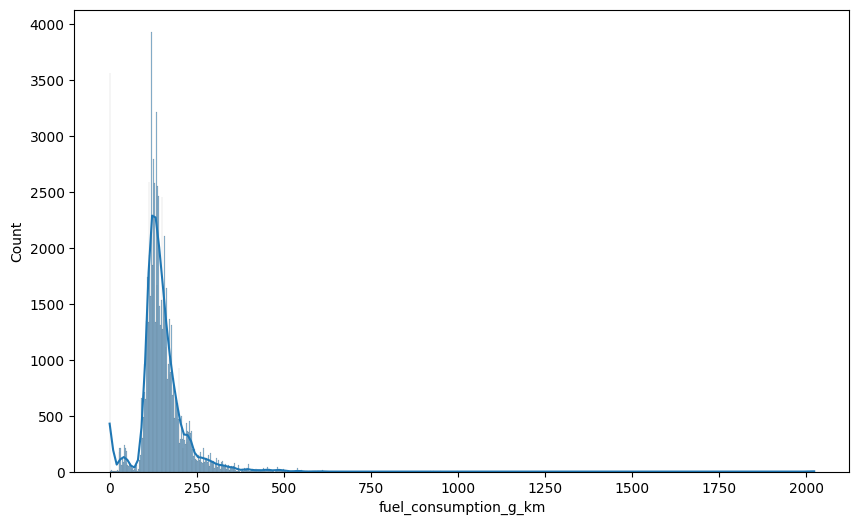

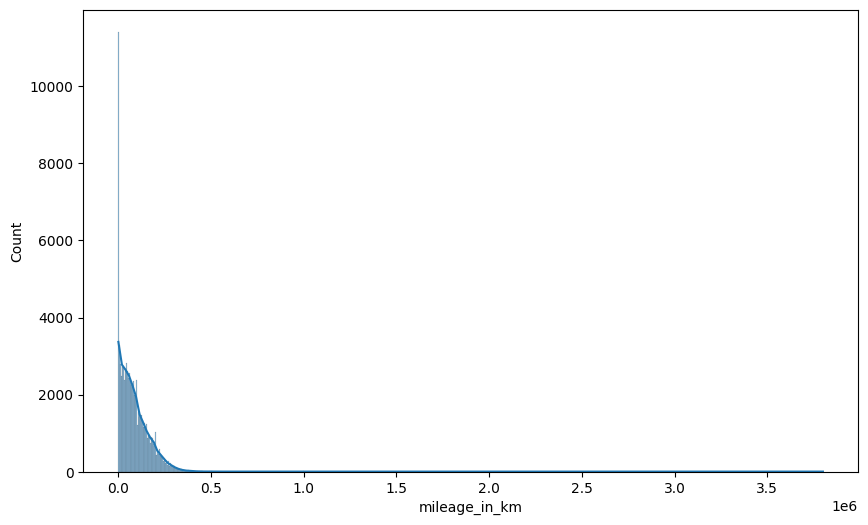

In [31]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=data,x=i,kde=True)
    plt.show()

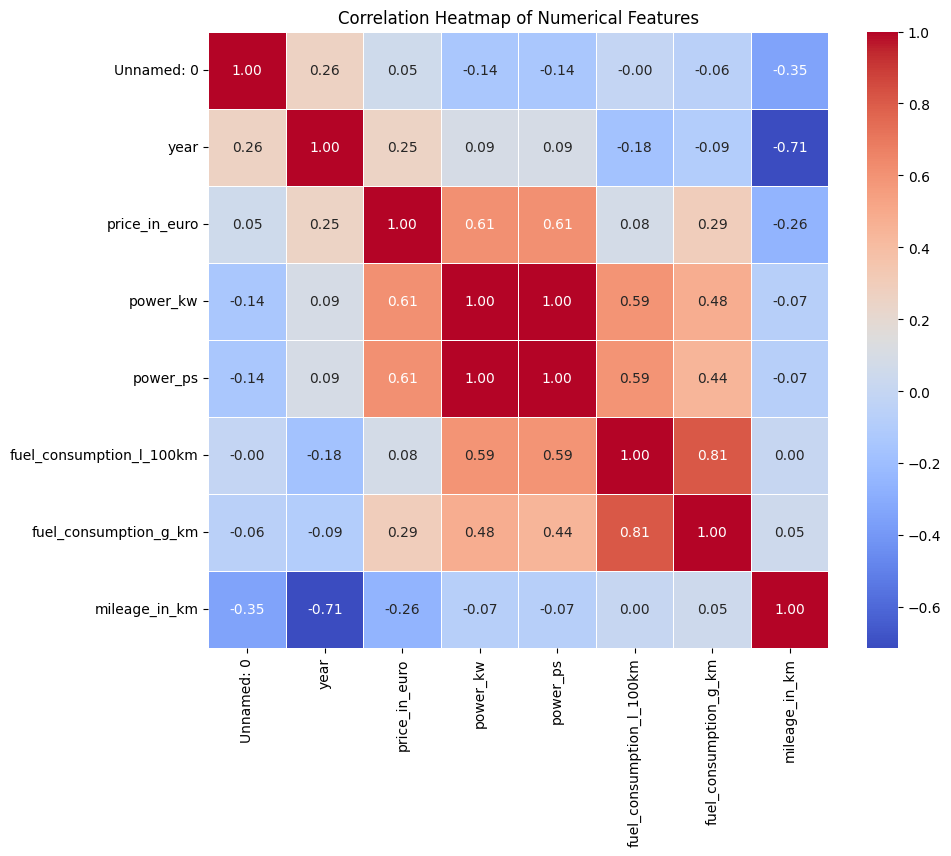

In [32]:
# Select numerical columns for heatmap
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [33]:
# # Calculate IQR and filter out the outliers
# Q1 = data['price_in_euro'].quantile(0.25)
# Q3 = data['price_in_euro'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data_no_outliers = data[(data['price_in_euro'] >= lower_bound) & (data['price_in_euro'] <= upper_bound)]

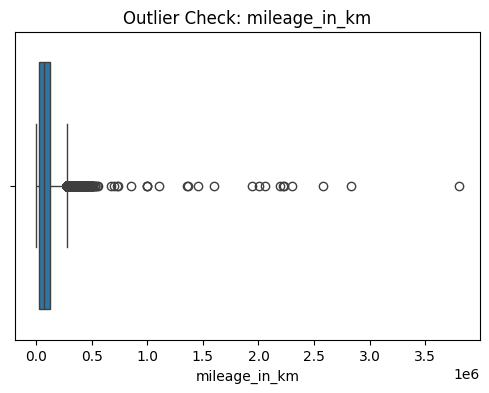

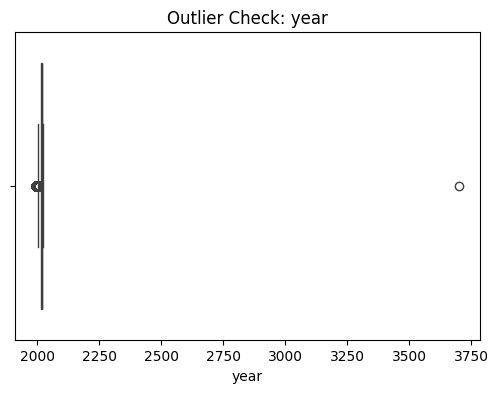

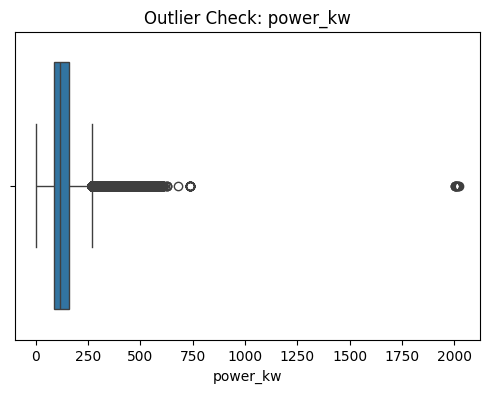

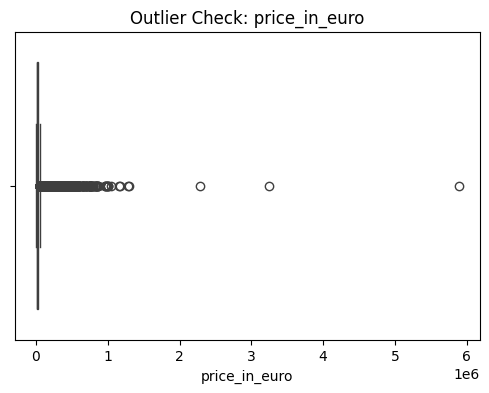

In [35]:
# Define numeric columns relevant for car data
numeric_cols = ['mileage_in_km', 'year', 'power_kw', 'price_in_euro']

# Loop through each numeric column and create a boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])  # Plot boxplot for each column
    plt.title(f"Outlier Check: {col}")
    plt.show()

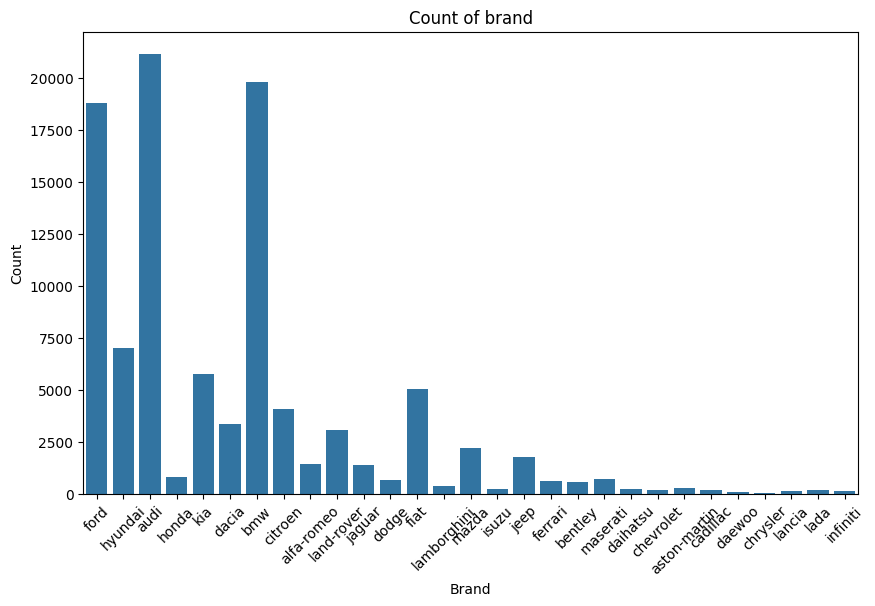

In [36]:
# Count the number of occurrences for each body type
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='brand')  # Replace 'body_type' with the correct column name
plt.title('Count of brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

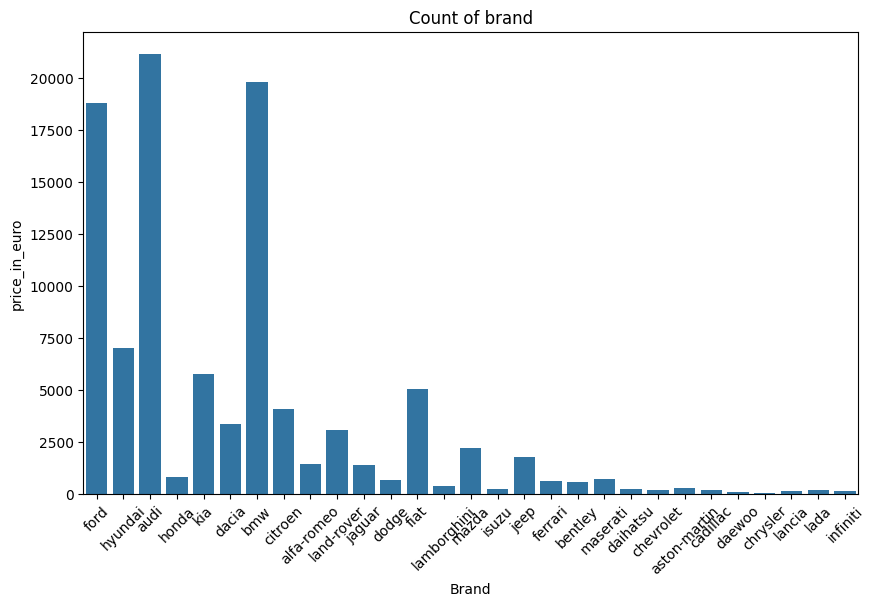

In [37]:
# Count the number of occurrences for each body type
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='brand')  # Replace 'body_type' with the correct column name
plt.title('Count of brand')
plt.xlabel('Brand')
plt.ylabel('price_in_euro')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

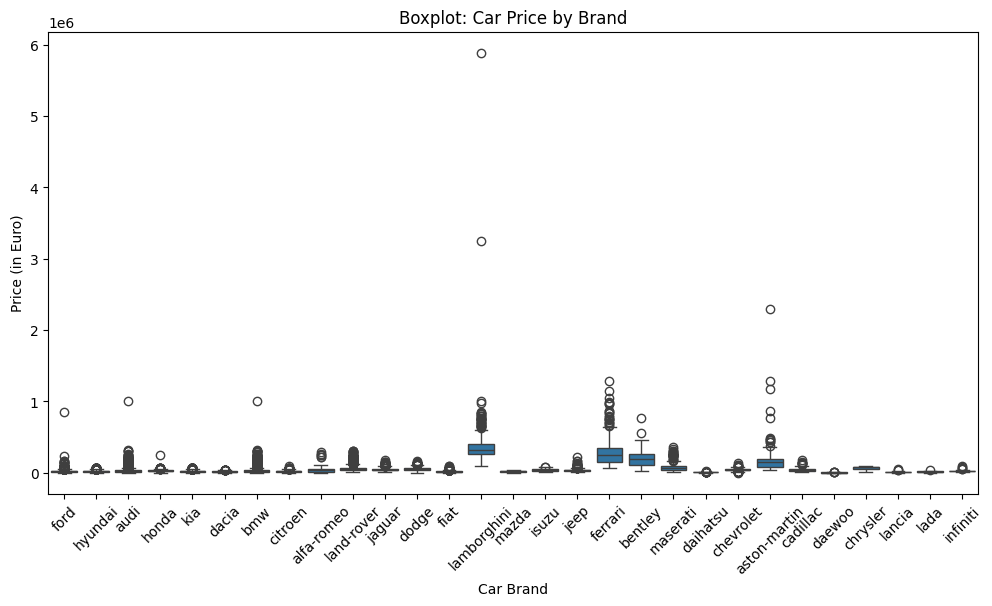

In [38]:
# Create a boxplot for price distribution by brand
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='brand', y='price_in_euro')  # Replace 'brand' and 'price_in_euro' if needed
plt.title('Boxplot: Car Price by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price (in Euro)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


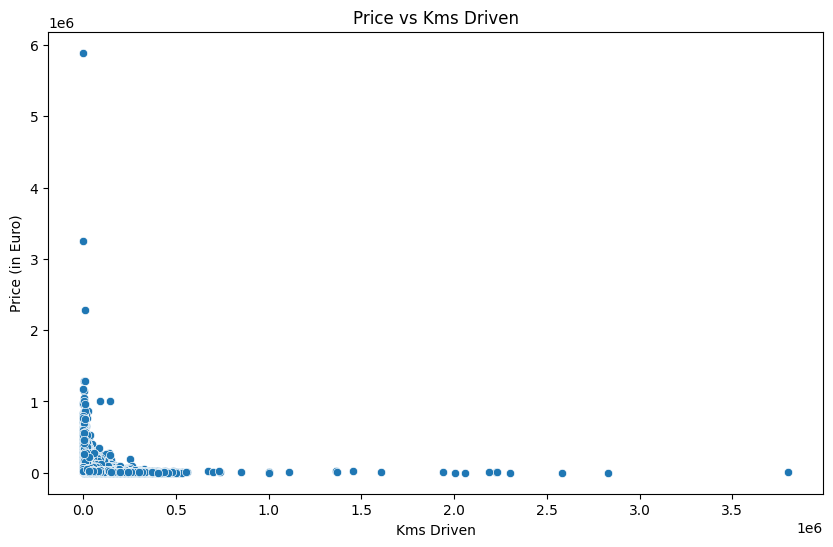

In [39]:
# Scatterplot to visualize the relationship between price and kilometers driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_in_km', y='price_in_euro', data=data)
plt.title("Price vs Kms Driven")
plt.xlabel("Kms Driven")
plt.ylabel("Price (in Euro)")
plt.show()

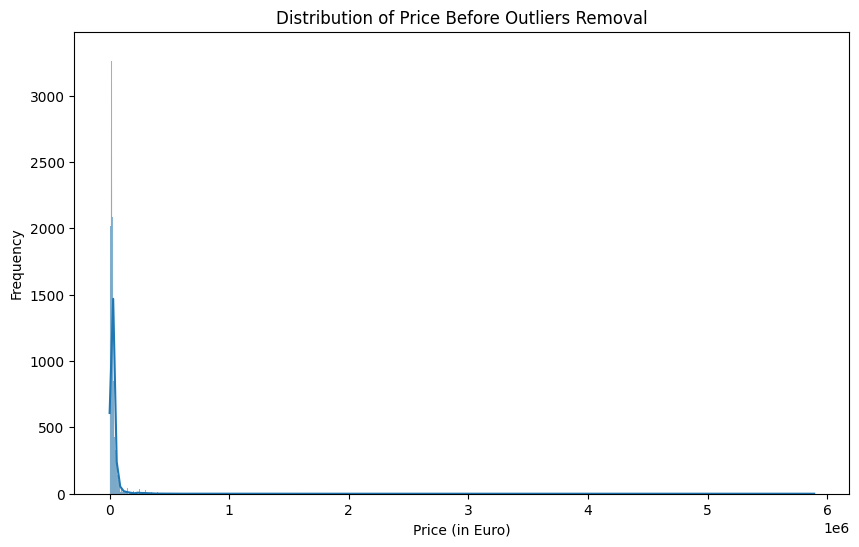

In [40]:
# Distribution plot for price before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['price_in_euro'], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price Before Outliers Removal")
plt.xlabel('Price (in Euro)')
plt.ylabel('Frequency')
plt.show()